Description:
<br>
This project employs agglomerative clustering to unveil insightful patterns in user ratings for various destinations such as churches, resorts, malls, museums, and zoos. Uncover the optimal number of clusters for each destination, providing a comprehensive understanding of user sentiments and preferences. Dive into the world of clustered data to discover hidden insights and enhance decision-making for businesses and travelers alike.

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [2]:
df = pd.read_csv('google_review_ratings.csv')
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
df.shape
# rows = 5456, cols= 26

(5456, 26)

In [4]:
df.columns = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls',
              'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 
              'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs',
              'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points',
              'monuments', 'gardens','Unnamed: 25']
df.head(2)

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


#### 1) Handling Null

In [5]:
df.isnull().sum()

User                        0
churches                    0
resorts                     0
beaches                     0
parks                       0
theatres                    0
museums                     0
malls                       0
zoo                         0
restaurants                 0
pubs_bars                   0
local_services              0
burger_pizza_shops          1
hotels_other_lodgings       0
juice_bars                  0
art_galleries               0
dance_clubs                 0
swimming_pools              0
gyms                        0
bakeries                    0
beauty_spas                 0
cafes                       0
view_points                 0
monuments                   0
gardens                     1
Unnamed: 25              5454
dtype: int64

In [6]:
df.drop('Unnamed: 25',axis=1,inplace=True)
df.columns

Index(['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

In [7]:
df.dropna(inplace=True)
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

#### Handling Duplicates

In [8]:
df.duplicated().sum()

0

#### Data Types

In [9]:
df.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [10]:
df['local_services'] = pd.to_numeric(df['local_services'])
# OR
# df['local_services'] = df['local_services'].astype(float)
df.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [11]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,...,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,...,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### EDA

#### Avg Rating for each feature

In [12]:
avg_rating = df.iloc[:,1:].mean()
avg_rating

churches                 1.455746
resorts                  2.320048
beaches                  2.489059
parks                    2.797103
theatres                 2.958904
museums                  2.893423
malls                    3.351476
zoo                      2.541177
restaurants              3.126542
pubs_bars                2.832695
local_services           2.549622
burger_pizza_shops       2.078401
hotels_other_lodgings    2.125820
juice_bars               2.190429
art_galleries            2.206140
dance_clubs              1.192710
swimming_pools           0.949349
gyms                     0.822525
bakeries                 0.969250
beauty_spas              0.999626
cafes                    0.965275
view_points              1.749345
monuments                1.531051
gardens                  1.560570
dtype: float64

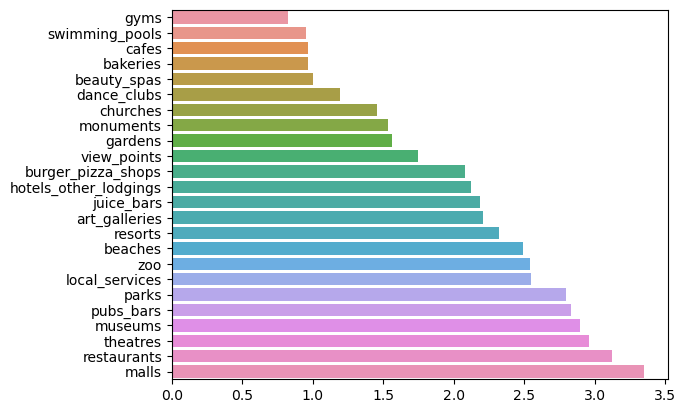

In [13]:
sns.barplot(y=avg_rating.index,x=avg_rating.values,
           order = avg_rating.sort_values(ascending=True).index)
plt.show()

In [14]:
df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [15]:
df.columns

Index(['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

In [16]:
data = df.iloc[:,1:]
data.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

#### Outlier Detection and Treatment

In [17]:
df.describe(percentiles=[0.01,0.02,0.03,0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
churches,5454.0,1.455746,0.827732,0.00,0.00,0.00,0.00,0.5500,1.34,5.0
resorts,5454.0,2.320048,1.421576,0.00,0.00,0.51,0.55,0.6400,1.91,5.0
beaches,5454.0,2.489059,1.247503,0.00,0.86,1.18,1.26,1.3100,2.06,5.0
parks,5454.0,2.797103,1.309188,0.83,1.26,1.32,1.33,1.3600,2.46,5.0
theatres,5454.0,2.958904,1.338785,1.12,1.26,1.33,1.34,1.3900,2.67,5.0
museums,5454.0,2.893423,1.282101,1.11,1.25,1.29,1.32,1.3700,2.68,5.0
malls,5454.0,3.351476,1.413291,1.12,1.23,1.28,1.30,1.3600,3.23,5.0
zoo,5454.0,2.541177,1.111398,0.86,0.97,1.11,1.18,1.2800,2.17,5.0
restaurants,5454.0,3.126542,1.356774,0.84,1.19,1.25,1.30,1.3500,2.80,5.0
pubs_bars,5454.0,2.832695,1.307299,0.81,0.87,0.95,1.02,1.1900,2.68,5.0


In [18]:
df.describe(percentiles=[0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,97%,98%,99%,max
churches,5454.0,1.455746,0.827732,0.00,1.34,2.6400,3.66,4.4394,5.0,5.0
resorts,5454.0,2.320048,1.421576,0.00,1.91,5.0000,5.00,5.0000,5.0,5.0
beaches,5454.0,2.489059,1.247503,0.00,2.06,5.0000,5.00,5.0000,5.0,5.0
parks,5454.0,2.797103,1.309188,0.83,2.46,5.0000,5.00,5.0000,5.0,5.0
theatres,5454.0,2.958904,1.338785,1.12,2.67,5.0000,5.00,5.0000,5.0,5.0
museums,5454.0,2.893423,1.282101,1.11,2.68,5.0000,5.00,5.0000,5.0,5.0
malls,5454.0,3.351476,1.413291,1.12,3.23,5.0000,5.00,5.0000,5.0,5.0
zoo,5454.0,2.541177,1.111398,0.86,2.17,5.0000,5.00,5.0000,5.0,5.0
restaurants,5454.0,3.126542,1.356774,0.84,2.80,5.0000,5.00,5.0000,5.0,5.0
pubs_bars,5454.0,2.832695,1.307299,0.81,2.68,5.0000,5.00,5.0000,5.0,5.0


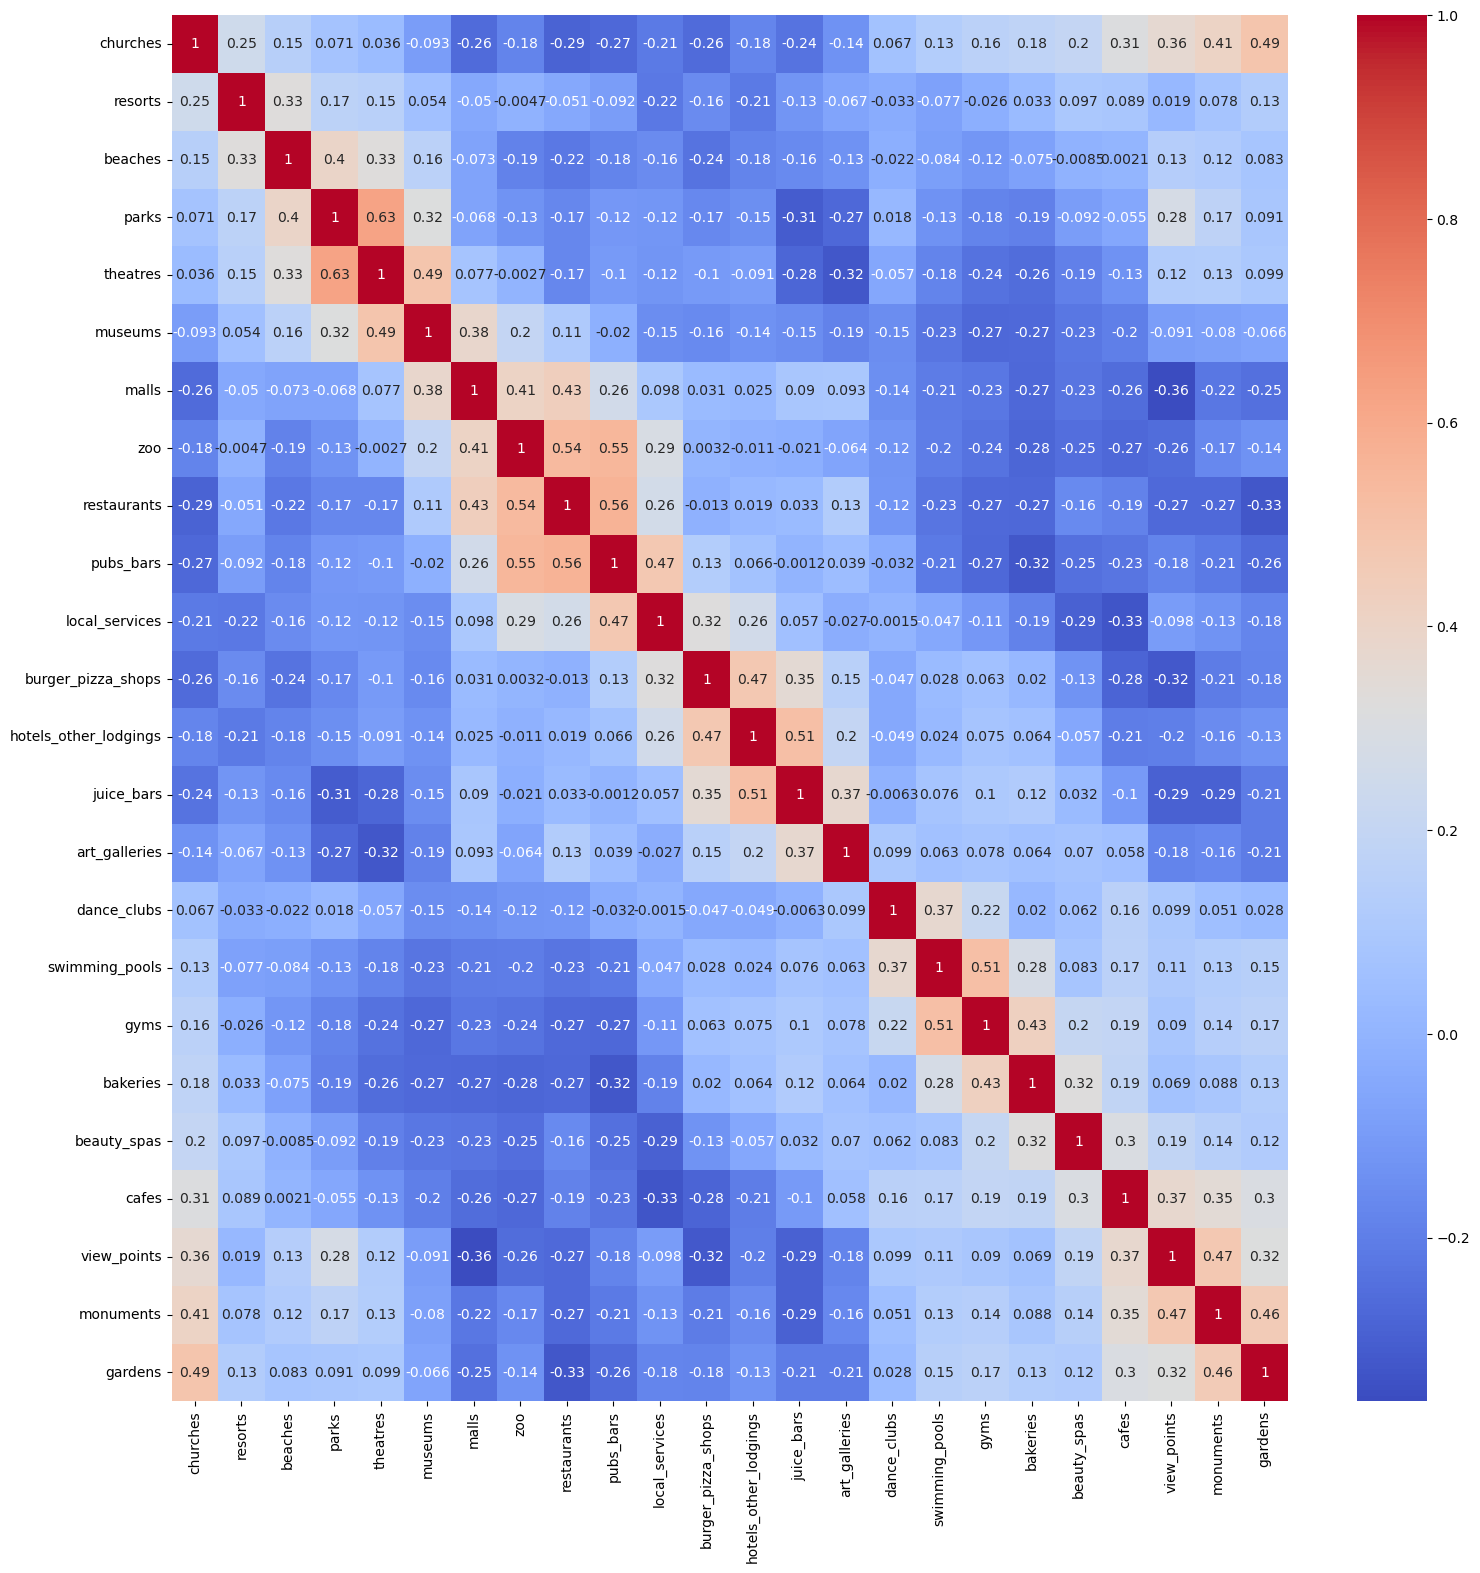

In [19]:
corr = df.iloc[:,1:].corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

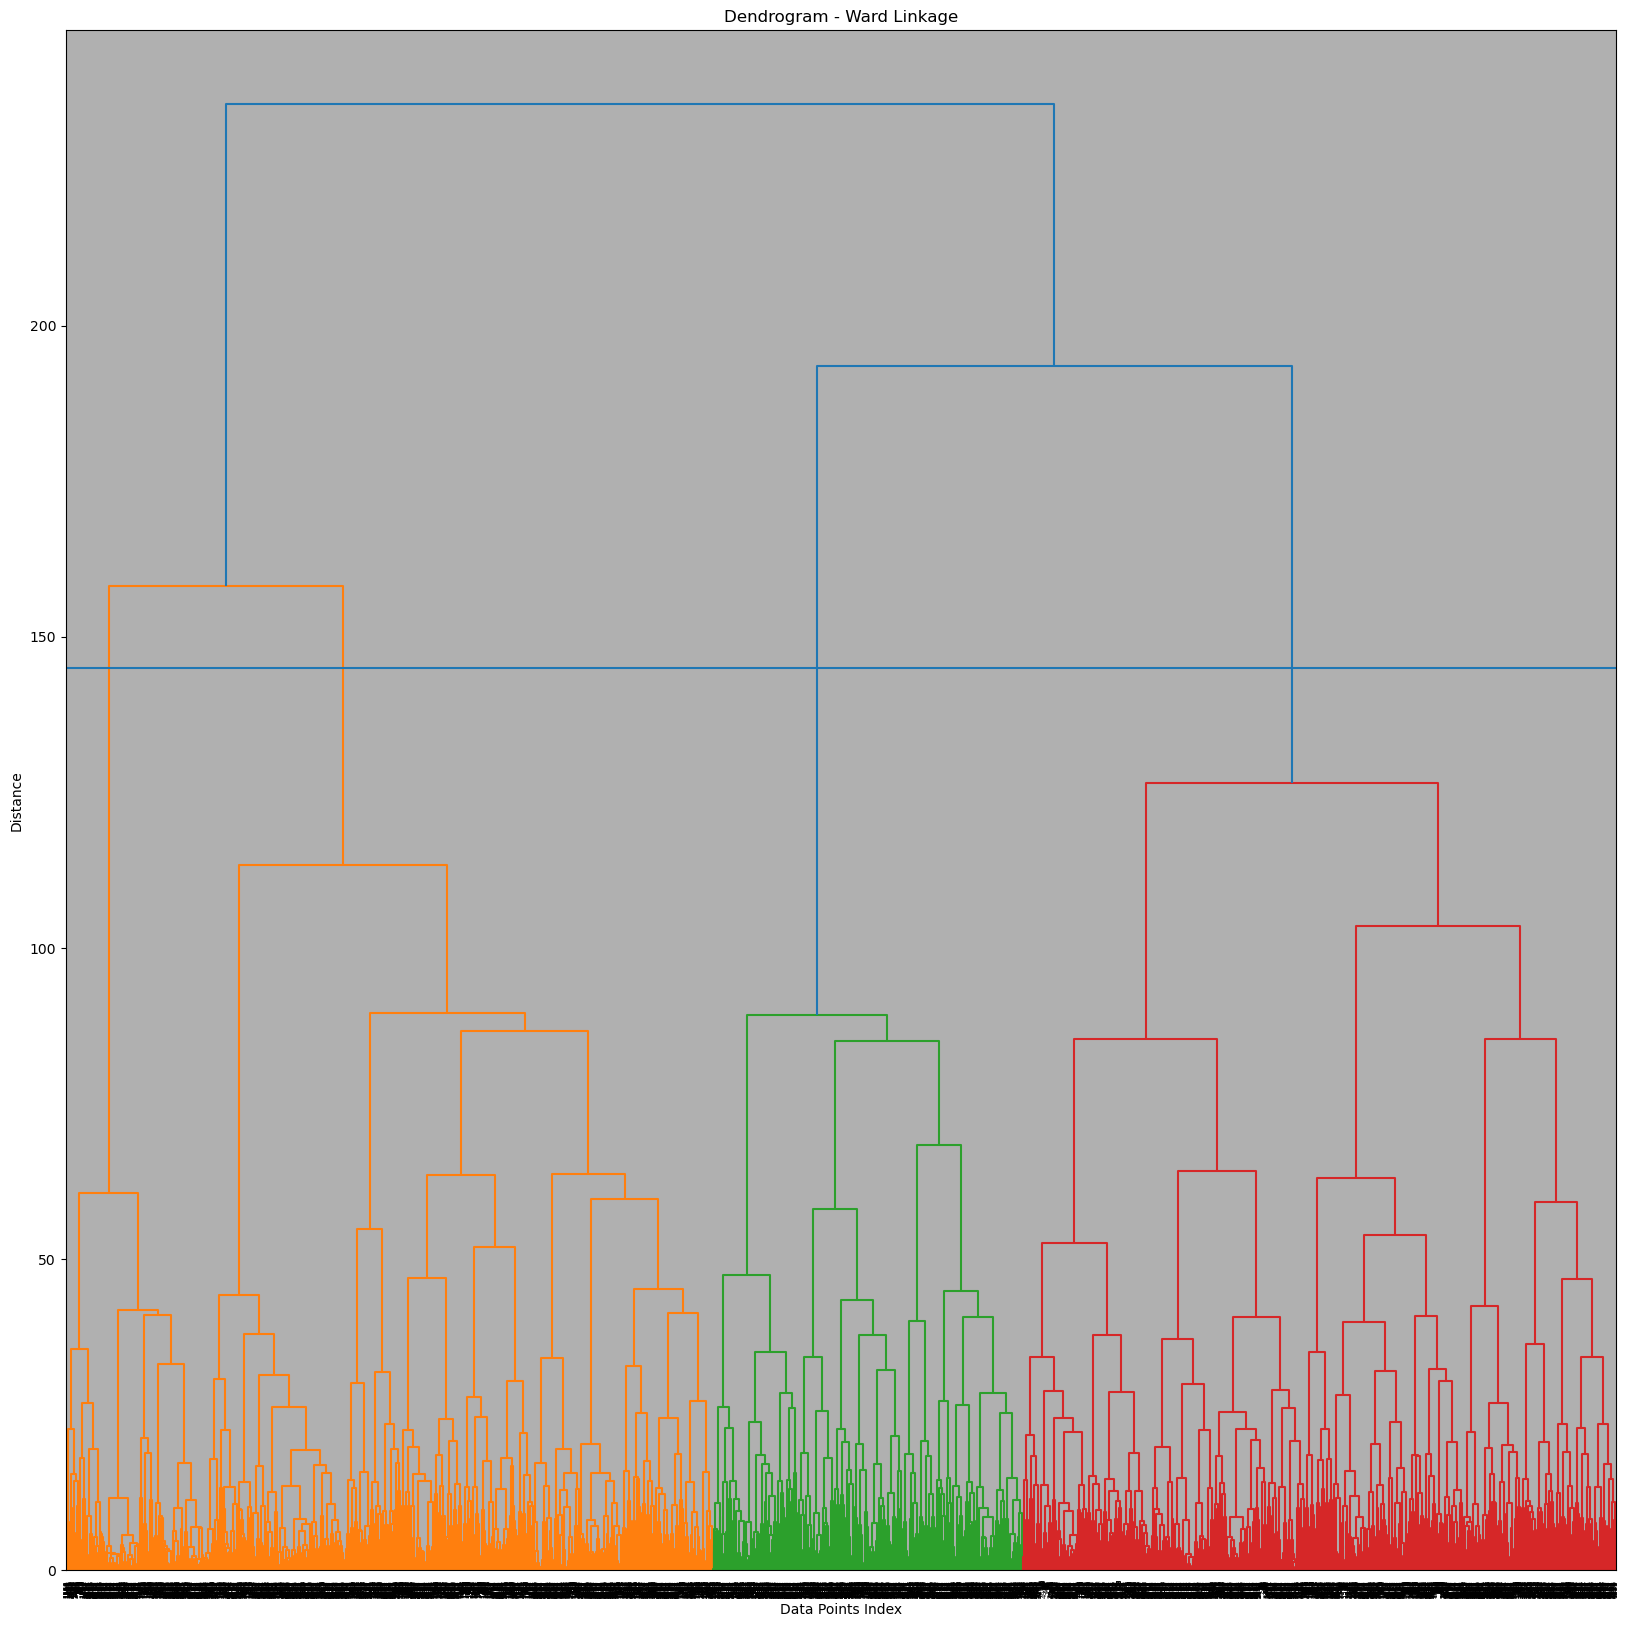

In [22]:
plt.figure(figsize=(20,20))
dendrogram(linkage(data,method='ward'))
plt.axhline(y=145)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

<b>Dendrogram:-</b>
<pre>
x = data points index
y = distance
horizontal line = distance at which the clusters are merged
vrticle line = distance between the clusters

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss = []
for i in range(1,15):
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(data)
    wcss.append(model.inertia_)
    
print('WCSS')
print(wcss)

C:\Users\shanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shanu\anaconda3\Lib\site-packages\sklearn\clust

WCSS
[215587.86852532084, 183738.9093853181, 165356.75796316343, 150786.19610695826, 141418.15338659106, 134337.60196152862, 129131.38208808727, 124784.53521375198, 120456.54013260384, 116687.9035049245, 113568.966033023, 110741.7698905563, 108720.87202054542, 105760.09174020973]


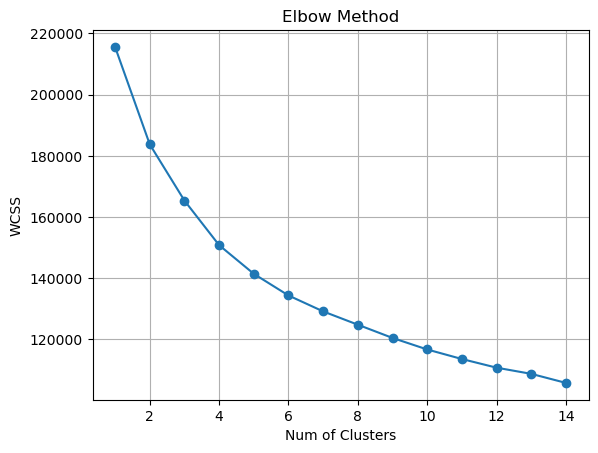

In [23]:
plt.plot(list(range(1,15)),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### Inference
We can go for 4 , 5 or 6 clusters

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
agg_cls = AgglomerativeClustering(n_clusters=4)  # linkage = ward
ypred4 = agg_cls.fit_predict(data)

In [26]:
from collections import Counter

In [27]:
print(Counter(ypred4))

Counter({0: 2086, 1: 1792, 2: 1090, 3: 486})


In [28]:
df1 = df.copy()

In [29]:
df1['Cls4'] = ypred4

In [30]:
def AggCls_Profiling(k,table):
    model = AgglomerativeClustering(n_clusters=k)
    ypred = model.fit_predict(table)
    print(Counter(ypred))
    table[f'Cls{k}'] = ypred
    r1 = table.drop(f'Cls{k}',axis=1).mean().reset_index().T
    r1.columns = r1.loc['index']
    r1 = r1.iloc[1:,]
    r1.index = ['Mean']
    r2 = table.groupby(f'Cls{k}').mean()
    cls_analysis = pd.concat([r1,r2]).T
    return cls_analysis

In [36]:
df2 = data.copy()
df3 = data.copy()
df4 = data.copy()

In [37]:
cls4_profile = AggCls_Profiling(4,df2)
cls4_profile

Counter({0: 2086, 1: 1792, 2: 1090, 3: 486})


,Mean,0,1,2,3
churches,1.455746,1.440796,1.203253,2.263661,0.63893
resorts,2.320048,2.431477,2.272712,2.815248,0.905679
beaches,2.489059,2.989401,2.066016,2.635046,1.573951
parks,2.797103,3.777234,2.252176,2.370761,1.555679
theatres,2.958904,4.156477,2.448945,2.127073,1.564671
museums,2.893423,3.651016,2.931936,1.958651,1.596193
malls,3.351476,3.501035,4.09067,2.042596,2.919506
zoo,2.541177,2.486232,3.338158,1.599835,1.949588
restaurants,3.126542,2.847133,4.264587,1.953835,2.759712
pubs_bars,2.832695,2.57813,3.873326,1.551642,2.96142


In [38]:
cls5_profile = AggCls_Profiling(5,df3)
cls5_profile

Counter({0: 1792, 1: 1093, 2: 1090, 4: 993, 3: 486})


,Mean,0,1,2,3,4
churches,1.455746,1.203253,1.630421,2.263661,0.63893,1.232075
resorts,2.320048,2.272712,2.251308,2.815248,0.905679,2.629789
beaches,2.489059,2.066016,2.843248,2.635046,1.573951,3.150272
parks,2.797103,2.252176,4.056414,2.370761,1.555679,3.46994
theatres,2.958904,2.448945,4.168518,2.127073,1.564671,4.143223
museums,2.893423,2.931936,3.283952,1.958651,1.596193,4.055045
malls,3.351476,4.09067,3.060375,2.042596,2.919506,3.986073
zoo,2.541177,3.338158,2.462754,1.599835,1.949588,2.512075
restaurants,3.126542,4.264587,2.720384,1.953835,2.759712,2.986647
pubs_bars,2.832695,3.873326,2.77764,1.551642,2.96142,2.35853


In [39]:
cls6_profile = AggCls_Profiling(6,df4)
cls6_profile

Counter({1: 1298, 0: 1093, 2: 1090, 4: 993, 5: 494, 3: 486})


,Mean,0,1,2,3,4,5
churches,1.455746,1.630421,1.187658,2.263661,0.63893,1.232075,1.244231
resorts,2.320048,2.251308,2.592196,2.815248,0.905679,2.629789,1.433259
beaches,2.489059,2.843248,2.263482,2.635046,1.573951,3.150272,1.547166
parks,2.797103,4.056414,2.307011,2.370761,1.555679,3.46994,2.108097
theatres,2.958904,4.168518,2.529831,2.127073,1.564671,4.143223,2.236417
museums,2.893423,3.283952,3.152704,1.958651,1.596193,4.055045,2.351862
malls,3.351476,3.060375,4.394191,2.042596,2.919506,3.986073,3.293158
zoo,2.541177,2.462754,3.241071,1.599835,1.949588,2.512075,3.593259
restaurants,3.126542,2.720384,4.205871,1.953835,2.759712,2.986647,4.418866
pubs_bars,2.832695,2.77764,3.681911,1.551642,2.96142,2.35853,4.376275
